In [23]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import shutil
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Data

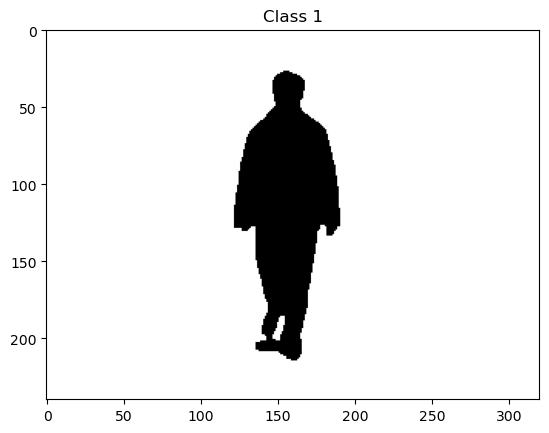

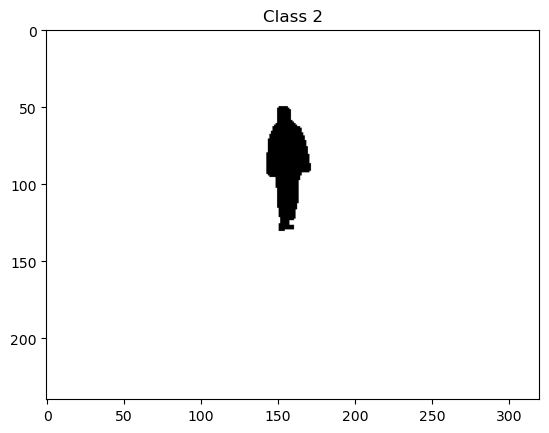

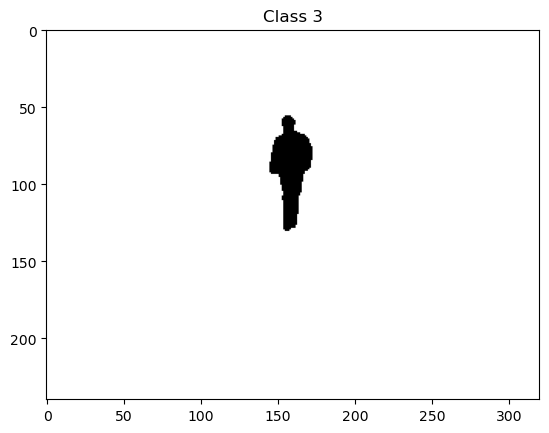

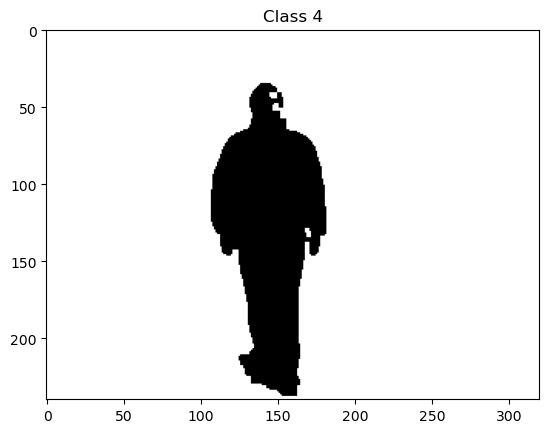

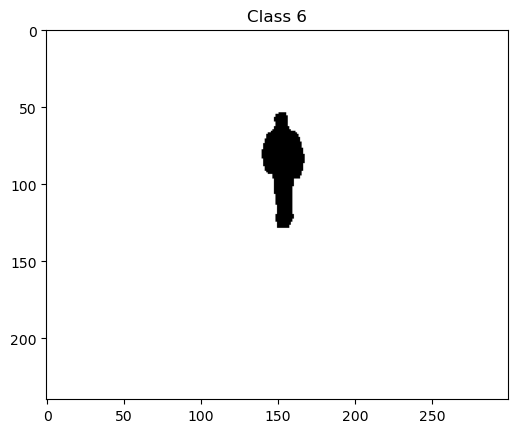

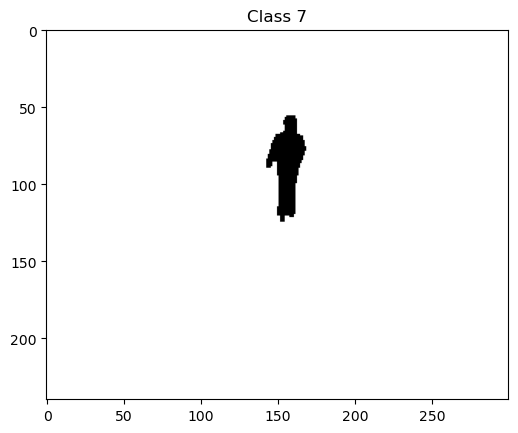

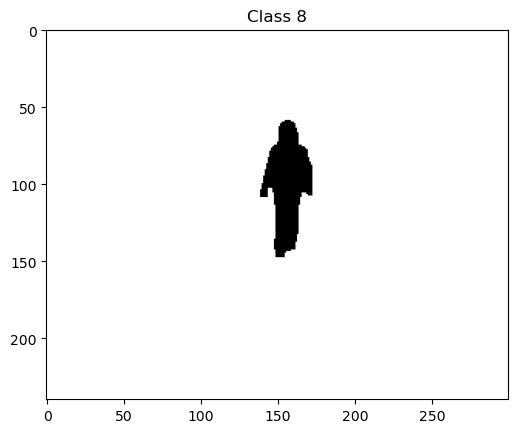

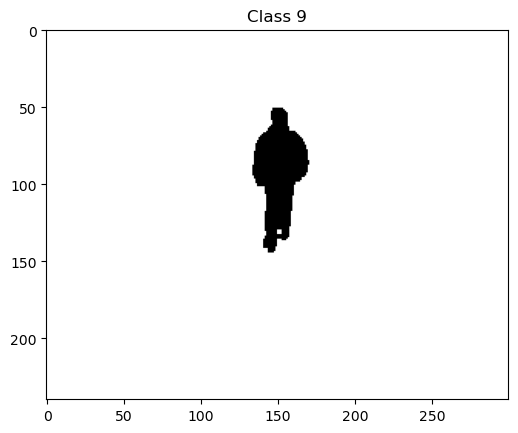

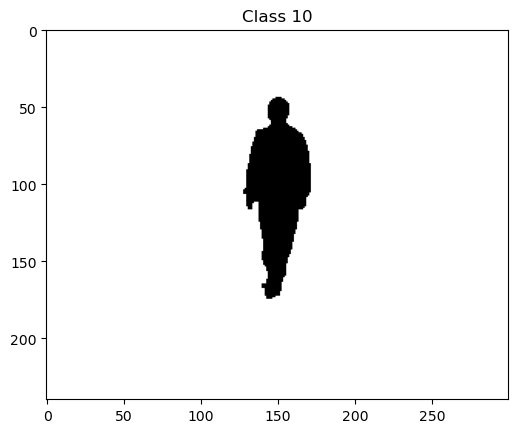

In [2]:
folder_path = "B-copy/"
# Iterate over each class folder
for i in range(1, 11):
    class_folder = os.path.join(folder_path, f"{i}")
    # Iterate over each subfolder within the class folder
    for subfolder in os.listdir(class_folder):
        subfolder_path = os.path.join(class_folder, subfolder)
        # Check if it's a directory
        if os.path.isdir(subfolder_path):
            # Assuming images are stored in the 11th subfolder
            images_folder = os.path.join(subfolder_path, "000")
            # Check if the images folder exists
            if os.path.isdir(images_folder):
                # Get the list of files in the images folder
                files = os.listdir(images_folder)
                # Assuming the first file is the image you want to display
                if len(files) > 0:
                    image_path = os.path.join(images_folder, files[0])
                    img = mpimg.imread(image_path)
                    plt.imshow(img, cmap=plt.cm.binary)
                    plt.title(f"Class {i}")
                    plt.show()
                    break  # Display only the first image for each class


# Gathering data

In [4]:
# Source directory containing nested folders
source_dir = "B-copy/"
destination_dir="dis"
# Destination directory where images for each person will be gathered
#destination_dir = "C"

# Create destination directory if it doesn't exist
if not os.path.exists(destination_dir):
    os.makedirs(destination_dir)

# Function to copy images from source folder to destination folder
def copy_images(source_folder, destination_folder):
    for root, _, files in os.walk(source_folder):
        for file in files:
            if file.endswith(".png"):  # Check if the file is a PNG image
                source_file = os.path.join(root, file)
                shutil.copy(source_file, destination_folder)

# Iterate over each person's folder
for person_folder in os.listdir(source_dir):
    person_folder_path = os.path.join(source_dir, person_folder)
    # Skip if it's not a directory
    if not os.path.isdir(person_folder_path):
        continue
    # Create a destination folder for this person if it doesn't exist
    person_destination_folder = os.path.join(destination_dir, person_folder)
    if not os.path.exists(person_destination_folder):
        os.makedirs(person_destination_folder)
    # Copy PNG images from all subdirectories within the person's folder to destination folder
    copy_images(person_folder_path, person_destination_folder)


# Testing

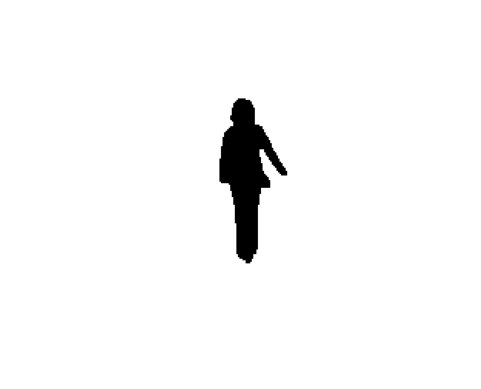

In [7]:
#image for person 8

# Path to your image file
image_path = "dis/8/008-bg-01-000-073.png"

# Load the image using matplotlib.image
img = mpimg.imread(image_path)

# Display the image using imshow
plt.imshow(img, cmap=plt.cm.binary)  # cmap is optional, used for specifying the colormap
plt.axis('off')  # Turn off axis
plt.show()

In [8]:
img.shape

(240, 300)

In [9]:
img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# CNN Model 

In [14]:
# Define constants
IMAGE_SIZE = (100, 100)  # Set the desired image size for resizing
NUM_CLASSES = 10  # Number of classes (folders) representing human subjects
DATA_DIR = "dis/"  # Path to your data directory

In [15]:
# Function to load and preprocess images
def preprocess_images(data_dir):
    images = []
    labels = []
    for i in range(1, NUM_CLASSES + 1):
        folder_path = os.path.join(data_dir, str(i))
        for filename in os.listdir(folder_path):
            img = load_img(os.path.join(folder_path, filename), target_size=IMAGE_SIZE)
            img_array = img_to_array(img)
            images.append(img_array)
            labels.append(i - 1)  # Subtract 1 to have labels starting from 0
    images = np.array(images, dtype="float32") / 255.0  # Normalize pixel values
    labels = to_categorical(labels, NUM_CLASSES)  # One-hot encode labels
    return images, labels

In [16]:
# Load and preprocess images
images, labels = preprocess_images(DATA_DIR)

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [20]:
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),  # Correctly placed Dropout layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
])

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,638,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,733,066 (6.61 MB)

 Trainable params: 1,733,066 (6.61 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
from keras.callbacks import LearningRateScheduler, EarlyStopping
from keras.optimizers import Adam
def lr_schedule(epoch, lr):
    if epoch % 5== 0 and epoch > 0:
        lr = lr * 0.9
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)
optimizer = Adam(learning_rate=0.001)

In [30]:
early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=10, mode='max', restore_best_weights=True)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

#history = model.fit(x=features_train, y=labels_train, epochs=70, batch_size=4, shuffle=True, validation_split=0.25, callbacks=[early_stopping_callback, lr_scheduler])

In [31]:
# Train the model and save the history
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5
2234/2234 ━━━━━━━━━━━━━━━━━━━━ 957s 427ms/step - accuracy: 0.4841 - loss: 1.4214 - val_accuracy: 0.8636 - val_loss: 0.3855
Epoch 2/5
2234/2234 ━━━━━━━━━━━━━━━━━━━━ 947s 424ms/step - accuracy: 0.8902 - loss: 0.3167 - val_accuracy: 0.9239 - val_loss: 0.2210
Epoch 3/5
2234/2234 ━━━━━━━━━━━━━━━━━━━━ 938s 420ms/step - accuracy: 0.9359 - loss: 0.1811 - val_accuracy: 0.9336 - val_loss: 0.1944
Epoch 4/5
2234/2234 ━━━━━━━━━━━━━━━━━━━━ 937s 419ms/step - accuracy: 0.9538 - loss: 0.1329 - val_accuracy: 0.9411 - val_loss: 0.1719
Epoch 5/5
2234/2234 ━━━━━━━━━━━━━━━━━━━━ 974s 436ms/step - accuracy: 0.9657 - loss: 0.1007 - val_accuracy: 0.9373 - val_loss: 0.1898


In [32]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

559/559 ━━━━━━━━━━━━━━━━━━━━ 111s 198ms/step - accuracy: 0.9368 - loss: 0.1879
Test Accuracy: 0.937325119972229


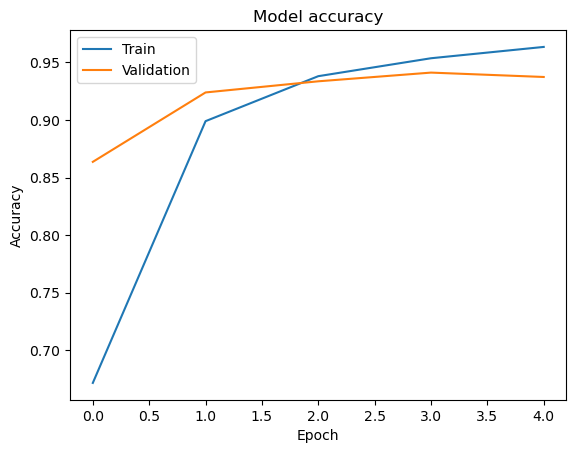

In [33]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

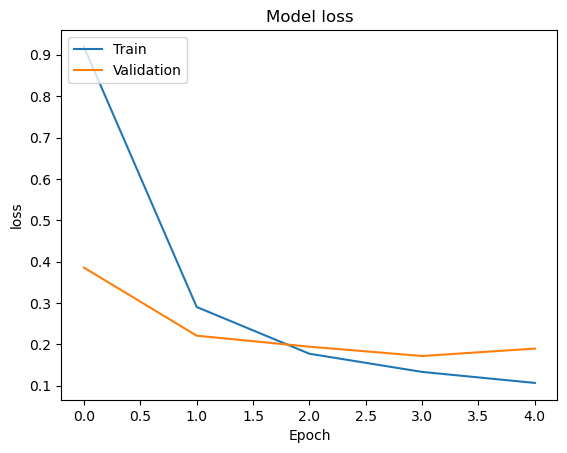

In [34]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [35]:
from tensorflow.keras.models import save_model
model.save('Gait_model_ad_lr.h5')